# WeatherPy
----

Analysis

As one approaches the equater the warmer the temprature becomes and vice versa the further you are from the equater the lower the Temp will be. It is interesting to me that there are more cities in the northern hemisphere than the southern.

There does not seem to be a strong correlation between latitude and the other factors we considered Humidity, Cloudiness, and Wind Speed.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#Regression
import seaborn as sns
from scipy import stats as st

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [70]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
#Looking at first 10 citites
cities[0:10]

['vanderhoof',
 'saskylakh',
 'burnie',
 'chokurdakh',
 'dingle',
 'hobart',
 'illoqqortoormiut',
 'nizhneyansk',
 'busselton',
 'port hedland']

In [73]:
#took this cell from class because it recieves the city then geo codes it(lat/lon of each ciy) then supply lat/lon to open weather api
rows = []

for city in cities:
    print()
    print(city)
    row = {}
    
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={api_key}"
        response = requests.get(url)

        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]

                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=imperial'
                response2 = requests.get(url2)

                if (response2.status_code == 200):
                    data2 = response2.json()

                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                    cloudiness=data2["clouds"]["all"]
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan
                    cloudiness= np.nan

                # put into flat dictionary
                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind
                row["cloudiness"]=cloudiness

                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Everything failed {city}. There should be an error above")
        print()
        
    # sleep
    time.sleep(2)


vanderhoof

saskylakh

burnie

chokurdakh

dingle

hobart

illoqqortoormiut

nizhneyansk

busselton

port hedland

nizhnedevitsk

mys shmidta

dikson

harper

marcona

komsomolets

kapaa

atambua

rikitea

chuy

hermanus

havoysund

itoman

shamkhal

charters towers

salinopolis

malartic

pindi gheb

krasnyy chikoy

victoria

kuba-taba

saldanha

mataura

punta arenas

maxixe

plettenberg bay

georgetown

rio gallegos

thompson

severo-kurilsk

albany

bluff

new norfolk

chulman

vaitupu

taolanaro
no lat/long for taolanaro

merke

ryotsu
no lat/long for ryotsu

touros

talnakh

norman wells

atuona

sekoma

la crosse

baghdad

ushuaia

yalutorovsk

iqaluit

chifeng

marawi

prieska

hithadhoo

simbahan

meulaboh

kasongo-lunda

taloqan

butaritari

toftir

nanortalik

avarua

tomatlan

marsabit

teya

labuhan

klaksvik

provideniya

severo-yeniseyskiy
no lat/long for severo-yeniseyskiy

bredasdorp

ilulissat

kirakira

elliot lake

kuusamo

beringovskiy
no lat/long for beringovskiy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#saved as df
df=pd.DataFrame(rows)
df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness
0,vanderhoof,54.017529,-124.007663,Clouds,13.91,89,1024,3.18,90
1,saskylakh,71.964953,114.093943,Clouds,-28.71,100,1030,3.74,100
2,burnie,-41.052369,145.906407,Clouds,59.14,69,1001,18.66,96
3,chokurdakh,70.619382,147.902397,Clouds,-41.13,100,1034,1.99,95
4,dingle,11.000076,122.671784,Clouds,83.17,79,1010,10.71,100


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         606 non-null    object 
 1   latitude     606 non-null    float64
 2   longitude    606 non-null    float64
 3   weather      606 non-null    object 
 4   temperature  606 non-null    float64
 5   humidity     606 non-null    int64  
 6   pressure     606 non-null    int64  
 7   wind_speed   606 non-null    float64
 8   cloudiness   606 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 42.7+ KB


In [76]:
#convert to csv
df.to_csv(output_data_file, index=False)
df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness
0,vanderhoof,54.017529,-124.007663,Clouds,13.91,89,1024,3.18,90
1,saskylakh,71.964953,114.093943,Clouds,-28.71,100,1030,3.74,100
2,burnie,-41.052369,145.906407,Clouds,59.14,69,1001,18.66,96
3,chokurdakh,70.619382,147.902397,Clouds,-41.13,100,1034,1.99,95
4,dingle,11.000076,122.671784,Clouds,83.17,79,1010,10.71,100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
#filter to humidity over 100
hum=df.humidity>100
df.loc[hum]

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness


In [78]:
#  Get the indices of cities that have humidity over 100%.
#NONE

In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#NONE

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

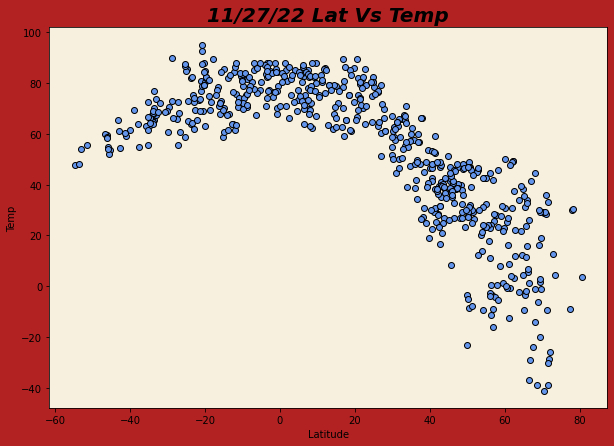

In [125]:
plt.figure(facecolor="firebrick",figsize =(10, 7))
ax = plt.axes()
ax.set_facecolor("#f7f0de")

plt.scatter(df.latitude, df.temperature,color='cornflowerblue',edgecolors="black")
plt.title("11/27/22 Lat Vs Temp",fontsize=20,fontstyle="italic",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Temp")
plt.show()

## Latitude vs. Humidity Plot

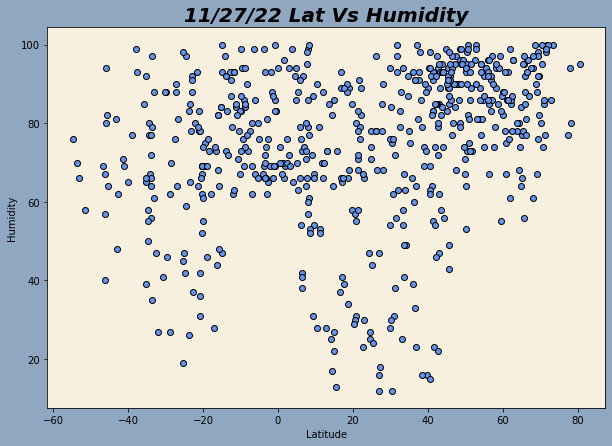

In [126]:
plt.figure(facecolor="#8fa7c0",figsize =(10, 7))
ax = plt.axes()
ax.set_facecolor("#f7f0de")

plt.scatter(df.latitude, df.humidity,color='cornflowerblue',edgecolors="black")
plt.title("11/27/22 Lat Vs Humidity",fontsize=20,fontstyle="italic",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

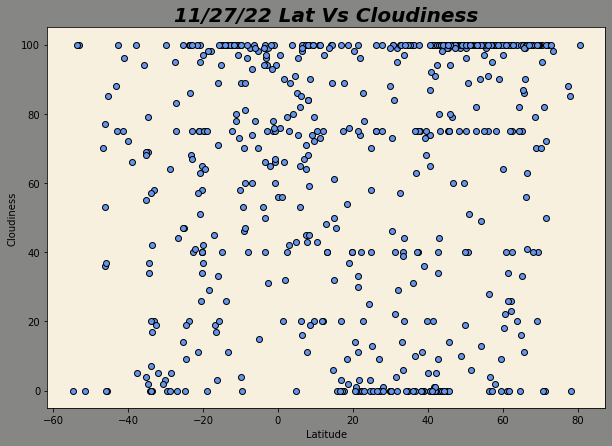

In [127]:
plt.figure(facecolor="#868784",figsize =(10, 7))
ax = plt.axes()
ax.set_facecolor("#f7f0de")

plt.scatter(df.latitude, df.cloudiness,color='cornflowerblue',edgecolors="black")
plt.title("11/27/22 Lat Vs Cloudiness",fontsize=20,fontstyle="italic",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

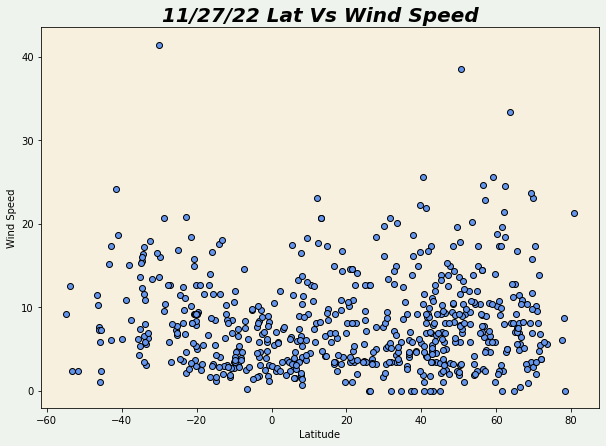

In [128]:
plt.figure(facecolor="#EEF4ED",figsize =(10, 7))
ax = plt.axes()
ax.set_facecolor("#f7f0de")
plt.scatter(df.latitude, df.wind_speed,color='cornflowerblue',edgecolors="black")
plt.title("11/27/22 Lat Vs Wind Speed",fontsize=20,fontstyle="italic",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7285193739049783


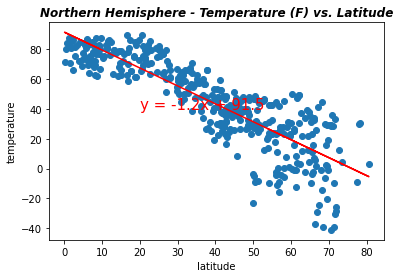

In [132]:
df_north_temp = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_north_temp['latitude']
y = df_north_temp['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The model is showing we have a strong relationship between temprature and latitude as you get further from 0 the colder the temp.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4406457110846444


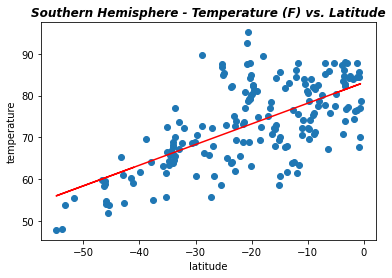

In [133]:
df_south_temp = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_south_temp['latitude']
y = df_south_temp['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

We also show a strong relationship for the southern hemisphere and Temp as you get closer to 0 the warmer it gets

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14454490255574445


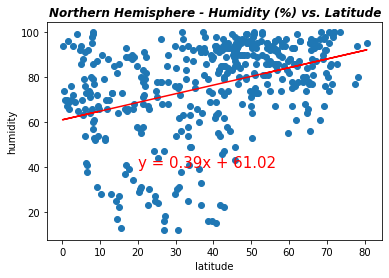

In [134]:
df_north_hum = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_north_hum['latitude']
y = df_north_hum['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05789263449578797


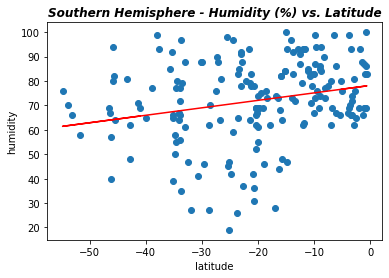

In [135]:
df_south_hum = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_south_hum['latitude']
y = df_south_hum['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.032153984280658875


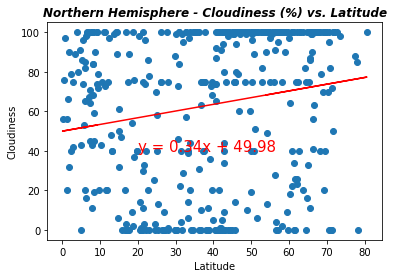

In [136]:
df_north_cloud = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_north_cloud['latitude']
y = df_north_cloud['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There isnt a strong relationship between cloudiness and latitude for the northern hemisphere same for the southern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11719860637601275


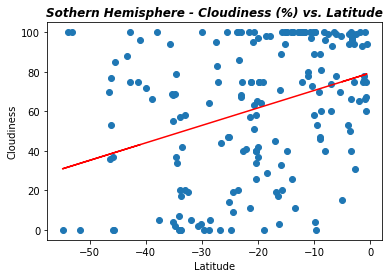

In [137]:
df_south_cloud = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_south_cloud['latitude']
y = df_south_cloud['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Sothern Hemisphere - Cloudiness (%) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016430546893248594


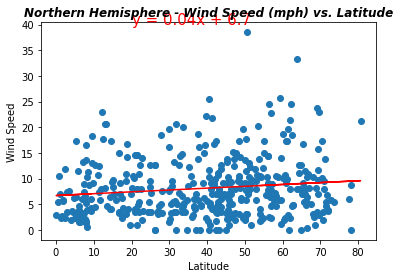

In [142]:
df_north_ws = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_north_ws['latitude']
y = df_north_ws['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0995701105364196


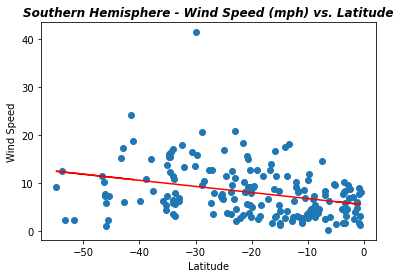

In [143]:
df_north_ws = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x = df_north_ws['latitude']
y = df_north_ws['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude",fontsize=12,fontstyle="italic",fontweight='bold')
print(f"The r-squared is: {rvalue**2}")
plt.show()